# New York Airbnb Analysis 

# Abstract 
Airbnb became one of a kind service that is used and recognized by the whole world. Millions of users including travelers and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world.
# Dataset Introduction 
This dataset describes the listing activity and metrics in NYC, NY for 2019.

# Insights I want to explore
🔑1.What can we learn about different hosts and areas?  
🔑2.What can we learn from predictions? (ex: locations, prices, reviews, etc)  
🔑3.Which hosts are the busiest and why?  
🔑4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [3]:
airbnb=pd.read_csv('C:/Users/qinru/Desktop/AB_NYC_2019.csv')
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
#Understand the dataset
airbnb.shape

(48895, 16)

In [5]:
#check null value inside dataset
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#Fill out null value in dataset, Delete unrelated varaibles
airbnb.drop(["host_name","last_review"],axis =1, inplace=True)

In [7]:
airbnb.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [8]:
airbnb.fillna({"reviews_per_month":0},inplace=True)

In [9]:
airbnb["reviews_per_month"].isnull().sum()

0

In [10]:
#Check neibourhood group
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
#check how many neighbourhood categories
len(airbnb['neighbourhood'].unique())

221

In [12]:
#Room Type
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [54]:
TOP15 = airbnb.host_id.value_counts().head(15)
TOP15

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
Name: host_id, dtype: int64

# 😁

In [23]:
#setting figure size for future visualizations
#sns.set()
sns.set(rc={'figure.figsize':(15,12)})

# Most Popular Host

[Text(0,0,'219517861'),
 Text(0,0,'107434423'),
 Text(0,0,'30283594'),
 Text(0,0,'137358866'),
 Text(0,0,'12243051'),
 Text(0,0,'16098958'),
 Text(0,0,'61391963'),
 Text(0,0,'22541573'),
 Text(0,0,'200380610'),
 Text(0,0,'7503643'),
 Text(0,0,'1475015'),
 Text(0,0,'120762452'),
 Text(0,0,'2856748'),
 Text(0,0,'205031545'),
 Text(0,0,'190921808')]

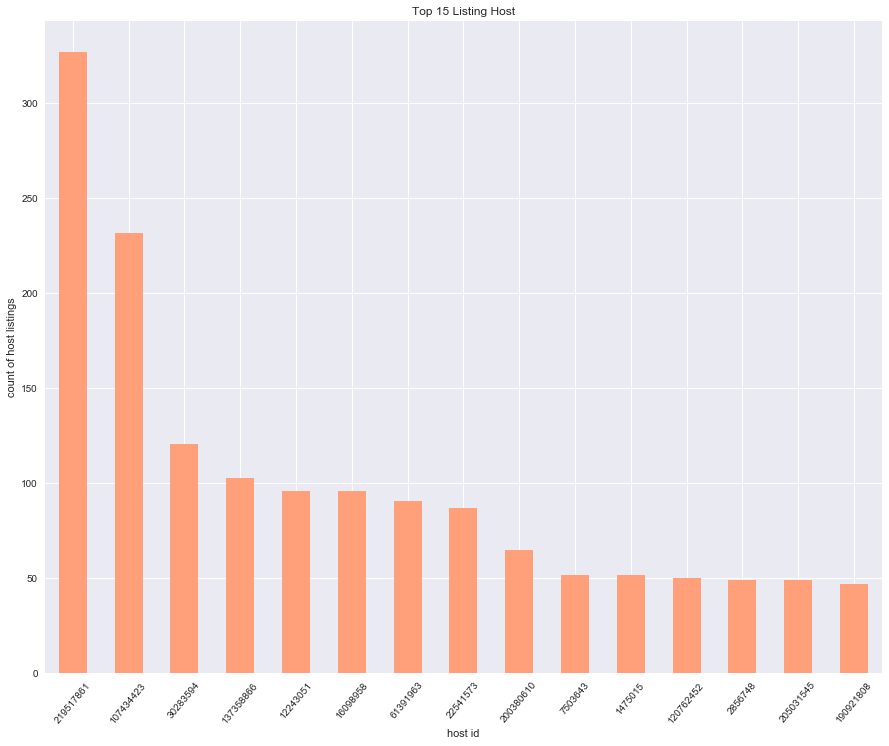

In [55]:
from itertools import cycle, islice
v_1 = TOP15.plot(kind="bar",color="LightSalmon")
v_1.set_title("Top 15 Listing Host")
v_1.set_ylabel("count of host listings")
v_1.set_xlabel("host id")
v_1.set_xticklabels(v_1.get_xticklabels(), rotation=50)

In [56]:
#Host 219517861 is the busiest.
popularhost = airbnb[airbnb.host_id==219517861]
popularhost.groupby('neighbourhood')['neighbourhood'].count()
#Most rooms of Host 219517861 are in Financial Distrct and the average price is $264
popularhost[popularhost.neighbourhood=='Financial District'].price.mean()

264.8532110091743

In [57]:
##Host popular not because the price is lower
airbnb[airbnb.neighbourhood == 'Financial District'].price.mean()
##disuss why in the next analysis

225.49059139784947

In [46]:
byhost = airbnb.set_index("host_id")
byhost.loc[219517861,:]

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,,,
219517861,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.00,327,309
219517861,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,0.73,327,219
219517861,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,0.60,327,159
219517861,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,1.86,327,91
219517861,30937591,Sonder | The Nash | Lovely Studio + Rooftop,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2.59,327,81
219517861,30937594,Sonder | The Nash | Brilliant Studio + Rooftop,Manhattan,Murray Hill,40.74845,-73.97446,Entire home/apt,245,2,4,0.94,327,137
219517861,30937595,Sonder | 11th Ave | Bright 1BR + Gym,Manhattan,Hell's Kitchen,40.76188,-73.99616,Entire home/apt,185,29,1,1.00,327,281
219517861,30937596,Sonder | 11th Ave | Contemporary 1BR + Gym,Manhattan,Hell's Kitchen,40.76037,-73.99744,Entire home/apt,185,29,1,1.00,327,332
219517861,30937597,Sonder | The Nash | Pristine Studio + Gym,Manhattan,Murray Hill,40.74884,-73.97589,Entire home/apt,252,2,7,1.19,327,117


# Price Analysis

## 1.Price Distribution

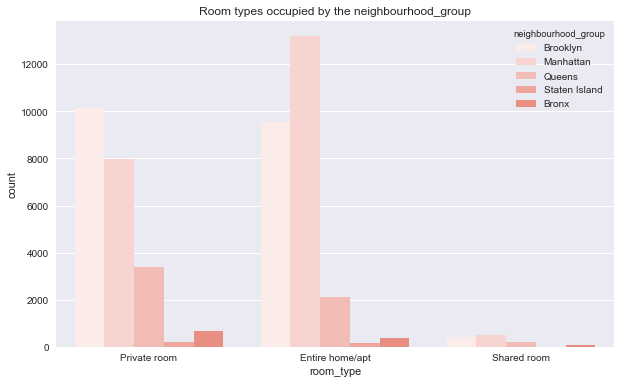

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = airbnb,color='salmon')
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

Most of the rooms in New York are Private room or Entrie home/apt. Shared room dstribute low perception. Thus, in the next analysis, I will focus on the first two types of rooms.

C:\Users\qinru\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


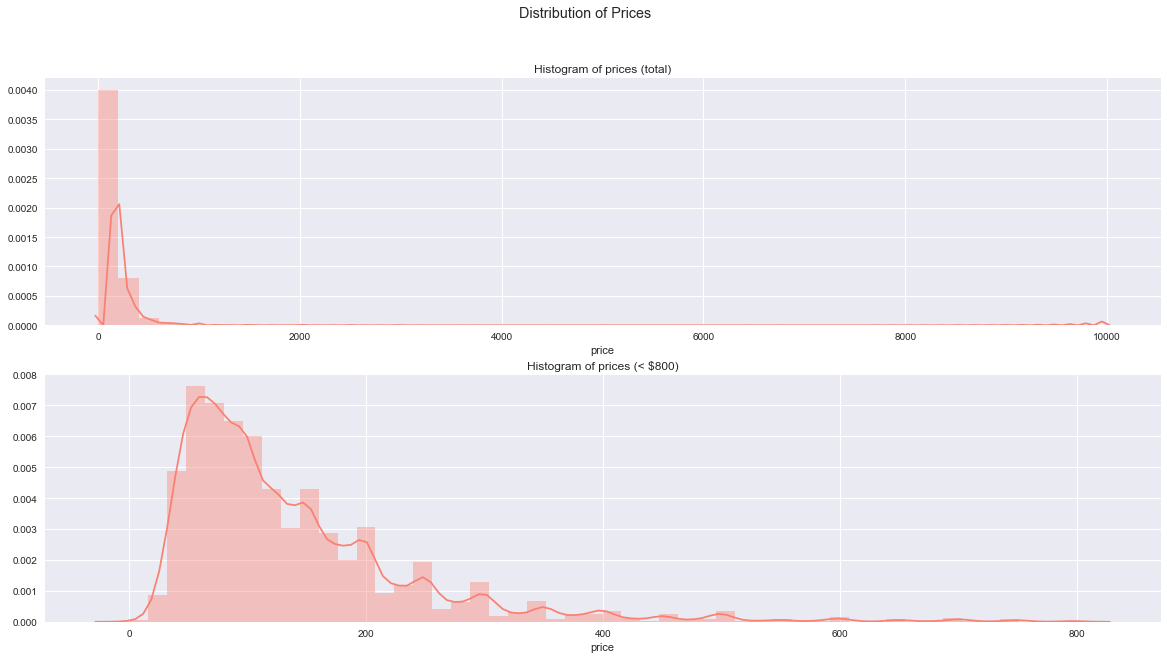

In [69]:
fig, ax= plt.subplots(2,1, figsize=(20,10))

ax[0].set_title("Histogram of prices (total)")
sns.distplot(airbnb['price'], kde=True, ax=ax[0],color="salmon")

ax[1].set_title("Histogram of prices (< $800)")
sns.distplot(airbnb[airbnb['price'] < 800]['price'], kde=True, ax=ax[1],color="salmon")


fig.suptitle("Distribution of Prices")
fig.show()


# 2.Price depending on neighborhood

C:\Users\qinru\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


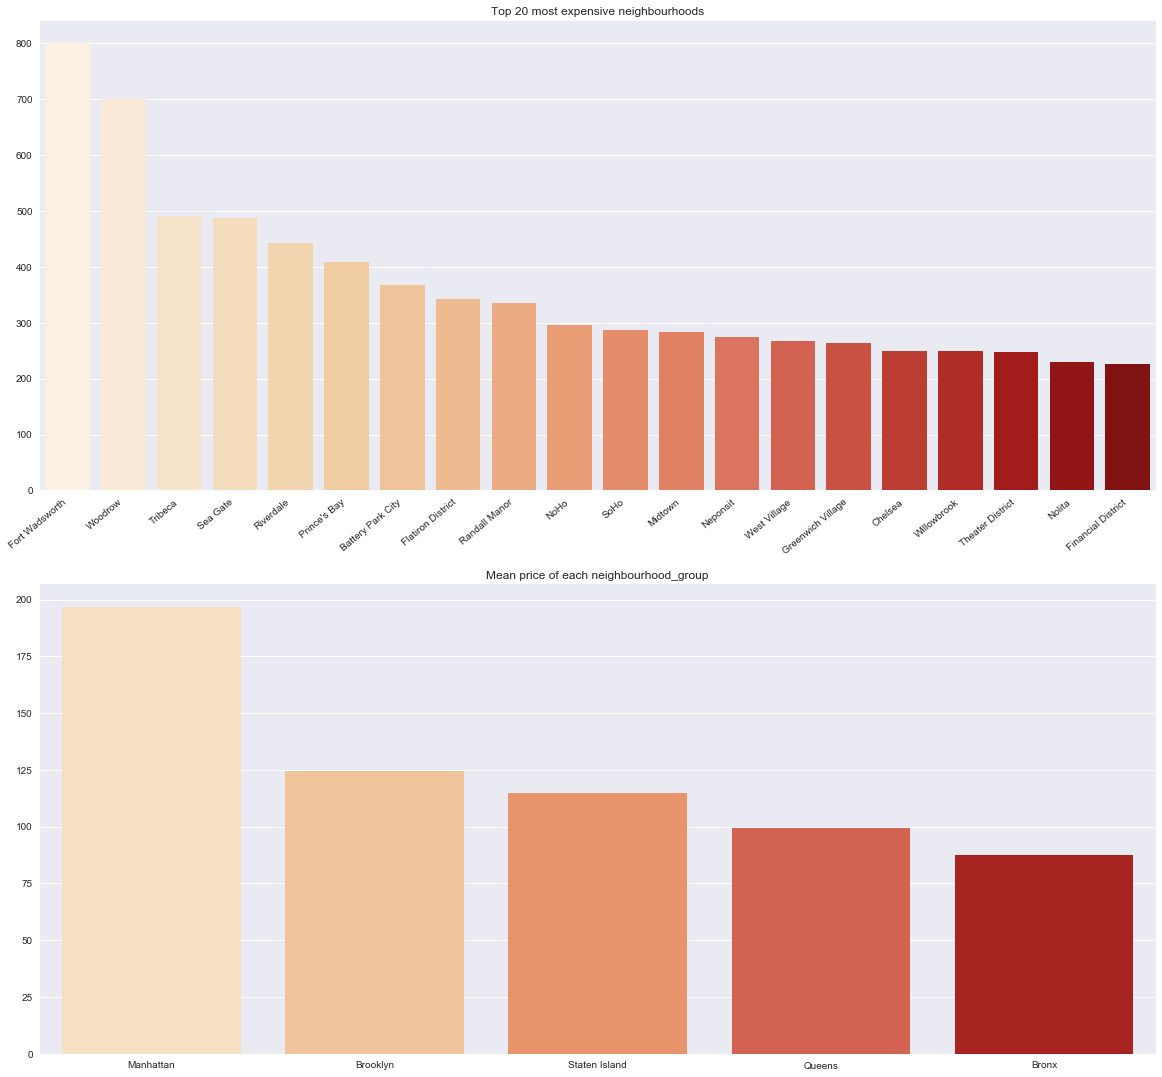

In [59]:
PricebyNeighbor = airbnb.groupby("neighbourhood")['price'].mean().sort_values(ascending = False)
fig, ax= plt.subplots(2,1, figsize=(20,19))
sns.barplot(PricebyNeighbor.index.tolist()[:20], PricebyNeighbor.values[:20], ax=ax[0], palette=("OrRd"))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=40, ha="right")
ax[0].set_title('Top 20 most expensive neighbourhoods')

d = airbnb.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)#[:5]
sns.barplot(d.index.tolist(), d.values, ax=ax[1], palette=("OrRd"))
#ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=40, ha="right")
ax[1].set_title('Mean price of each neighbourhood_group')

fig.show()

In [60]:
sub_6=airbnb[airbnb.price < 400]
sub_7 = airbnb[airbnb['price'].between(400, 1000, inclusive=True)]

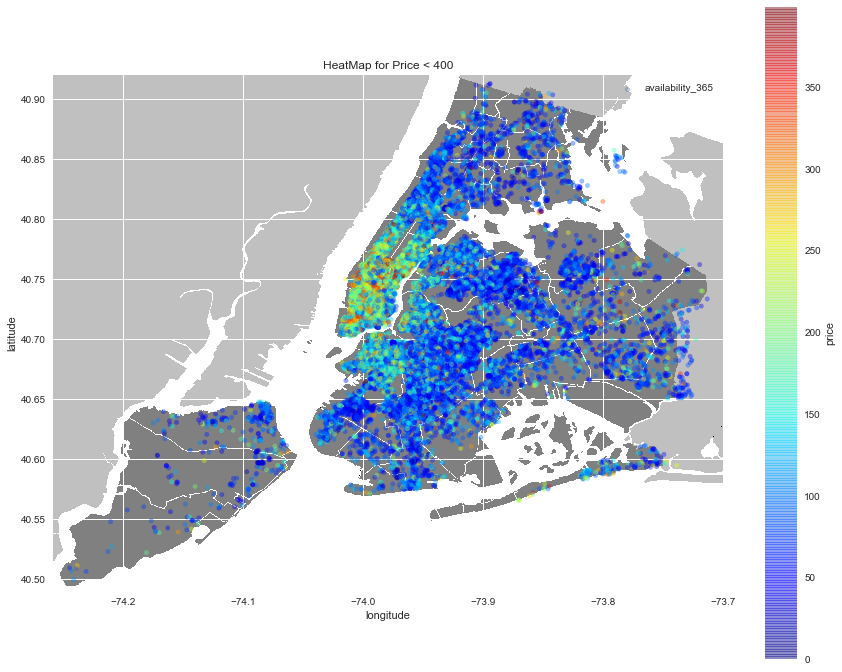

In [62]:
import urllib
#initializing the figure size
plt.figure(figsize=(15,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', title = 'HeatMap for Price < 400',x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

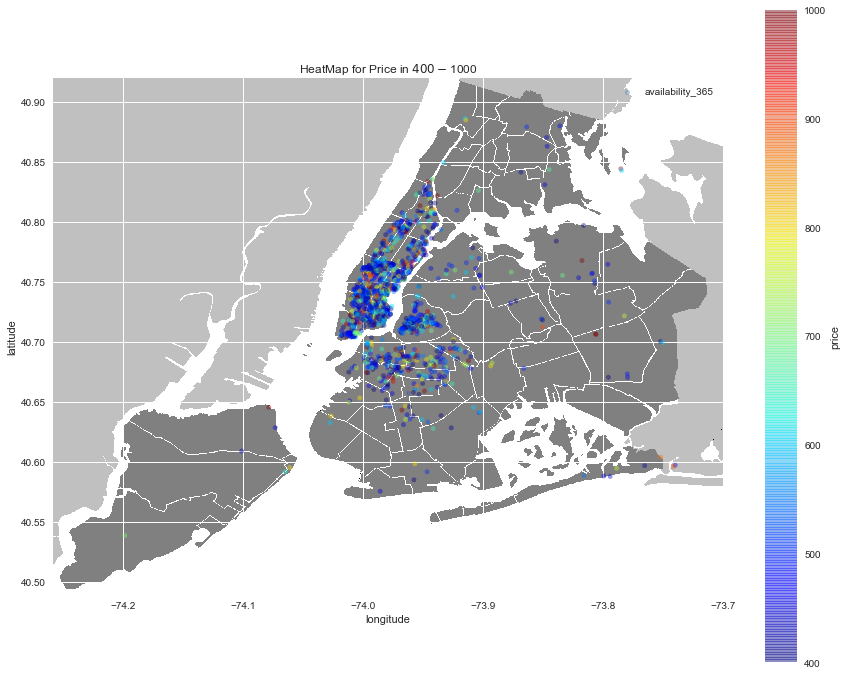

In [63]:
plt.figure(figsize=(15,12))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_7.plot(kind='scatter', title = 'HeatMap for Price in $400-$1000',x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

# 3.Price depend on Room Type

In [64]:
airbnb.groupby('room_type')['price'].mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

C:\Users\qinru\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


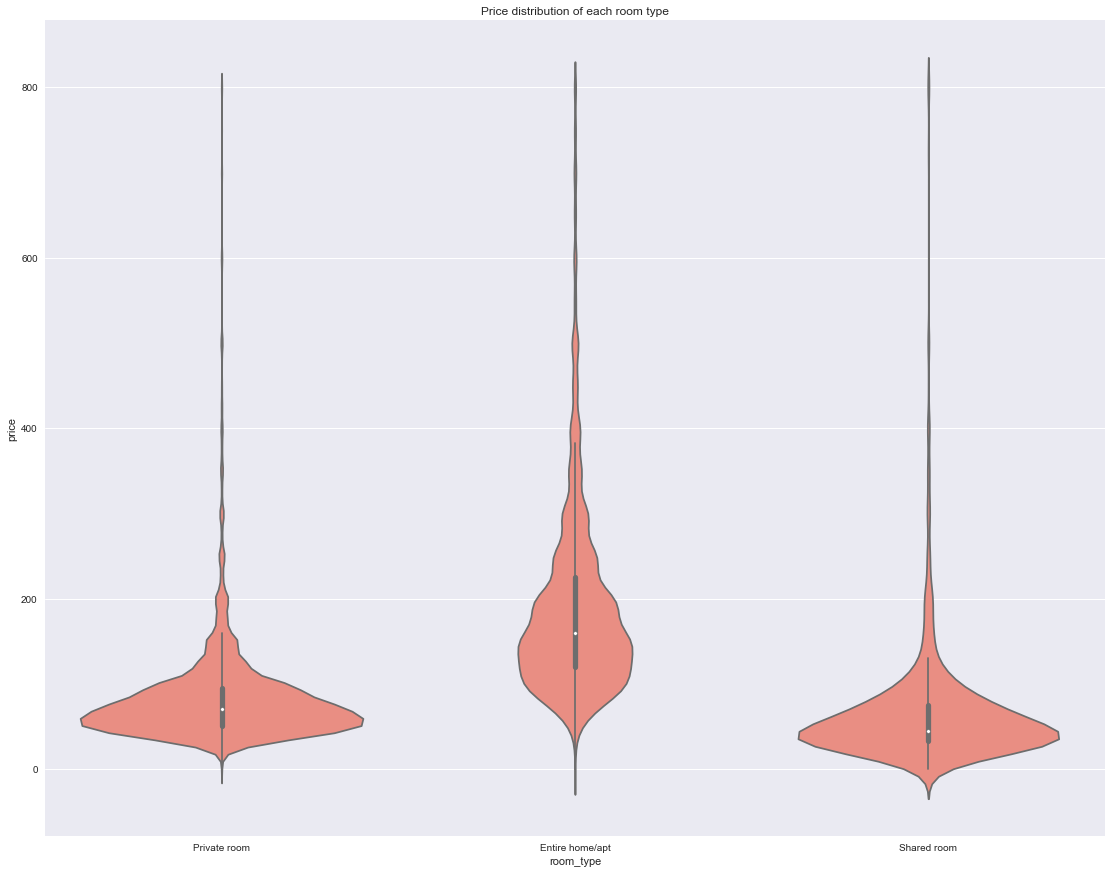

In [65]:
fig, ax= plt.subplots(figsize=(19,15))
sns.violinplot(x="room_type", y="price", data=airbnb[airbnb['price'] <= 800], ax=ax,color="salmon")
ax.set_title('Price distribution of each room type')
fig.show()

# Price depend on Neighbourhood and Room type

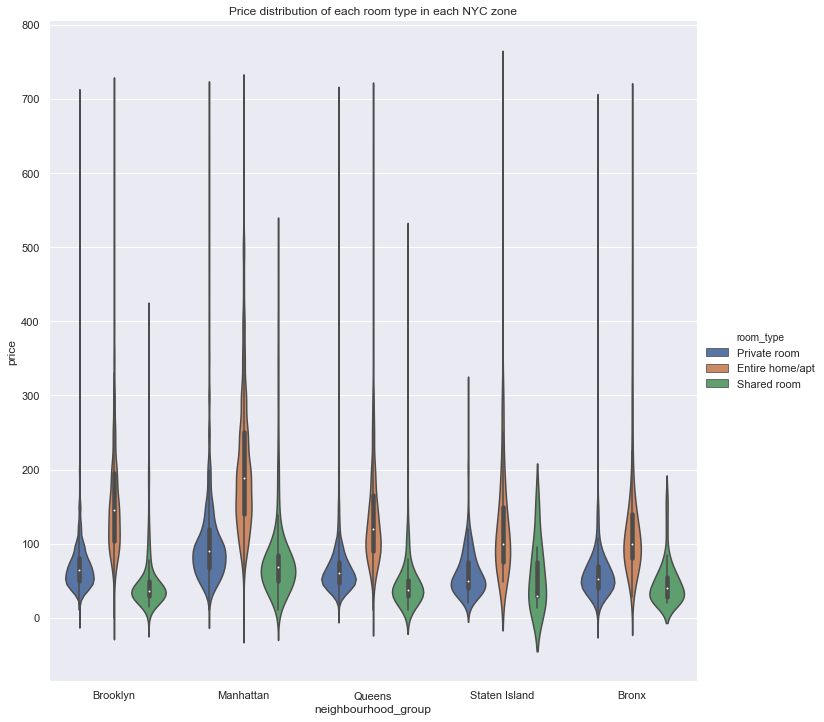

In [73]:
f = sns.catplot(y="price", x="neighbourhood_group", hue="room_type", data=airbnb[airbnb['price'] <= 700], kind='violin', height=10)
#f.axes[0][0].set_xlim(0,)
plt.title('Price distribution of each room type in each NYC zone')
plt.show()

# Summarizing our findings, suggesting other features
First, I have found that the top host has 327 listings. Further,I analysis the neighborhood listing densities and created heatmaps to present it.Finally,I found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. 
